In [1]:
import pandas as pd
import numpy as np
from keras import layers,models,optimizers
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Heart_disease_statlog.csv")
cols = ["age","sex","cp","trestbps", "chol","restecg", "oldpeak","thal"]
target = 'target'
print(df.shape)
df.head(10)


(270, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0
5,65,1,3,120,177,0,0,140,0,0.4,0,0,3,0
6,56,1,2,130,256,1,2,142,1,0.6,1,1,2,1
7,59,1,3,110,239,0,2,142,1,1.2,1,1,3,1
8,60,1,3,140,293,0,2,170,0,1.2,1,2,3,1
9,63,0,3,150,407,0,2,154,0,4.0,1,3,3,1


In [3]:
new_data = df[cols]
target = df['target']

part = 189  # el dataset tiene 270 datos, se desea dividir en 2 partes

# dividimos el dataset en datos de entrenamiento y datos de evaluacion
# train data
train_data = new_data.iloc[:part,:]
train_labels = target.iloc[:part]

# test data
test_data = new_data.iloc[part :,:]
test_labels = target.iloc[part:]



<Figure size 640x480 with 0 Axes>

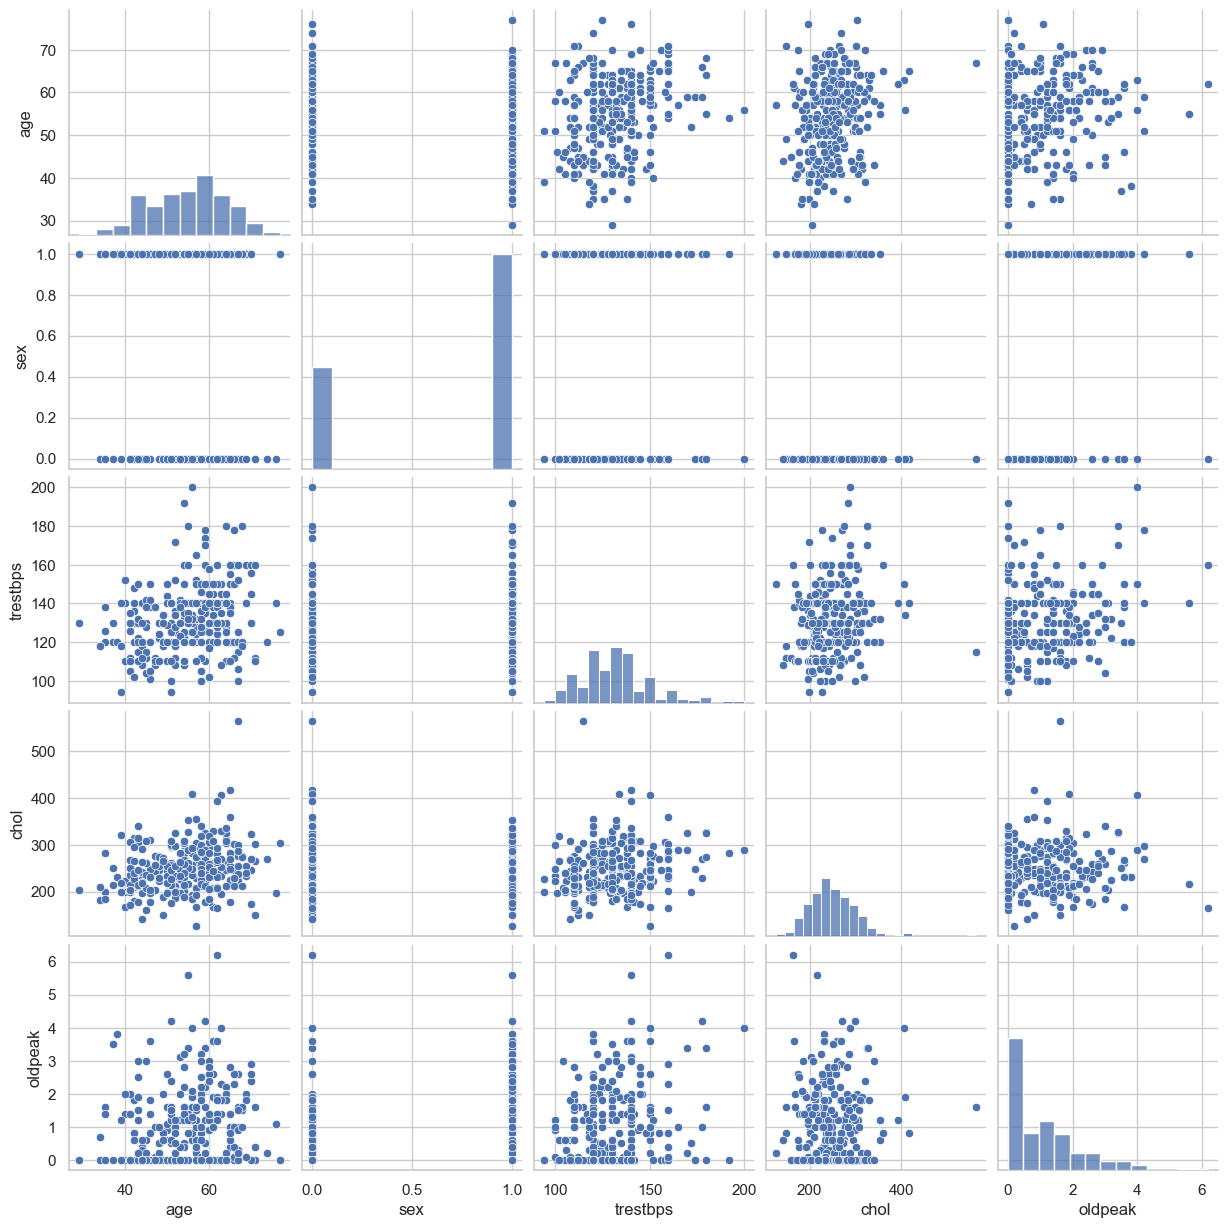

In [4]:
col2 = ['age','sex','trestbps','chol','oldpeak']

sns.set(style='whitegrid', context='notebook')
fig = plt.figure()
sns.pairplot(df[col2], height=2.5,diag_kind='hist') 
plt.show()

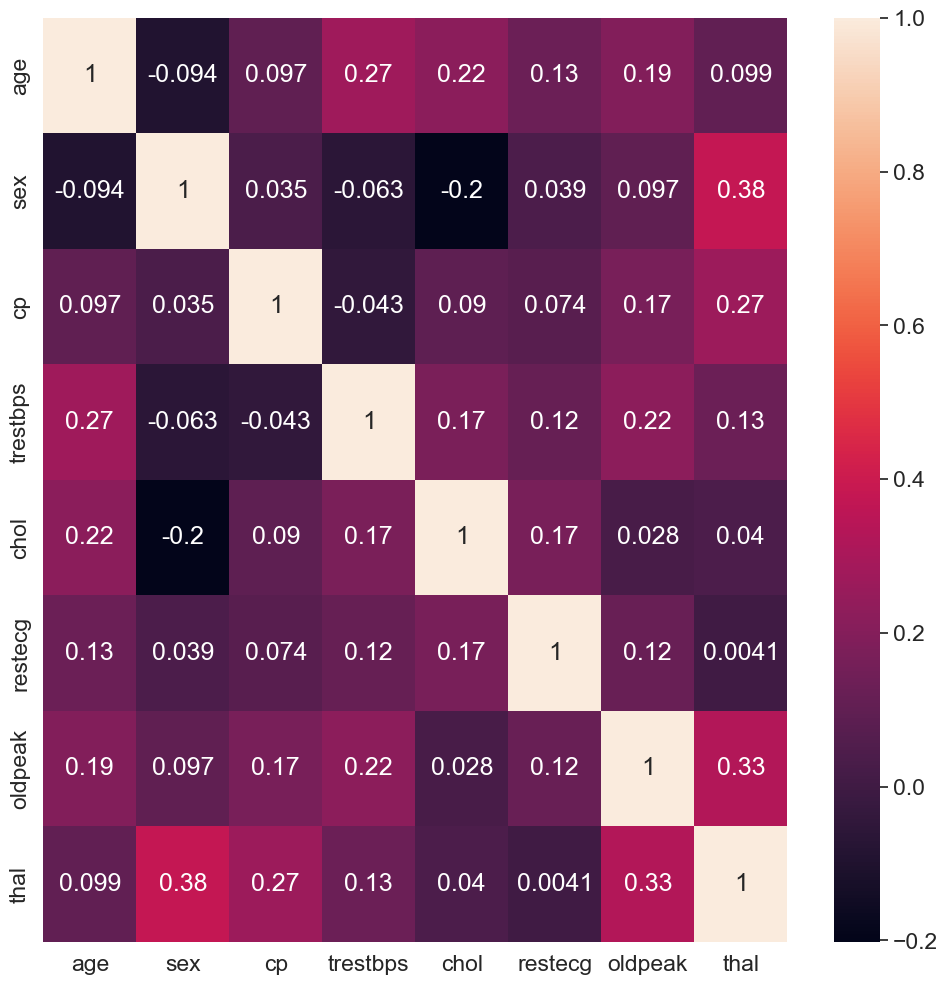

In [5]:
plt.figure(figsize=(12,12))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale= 1.5)
sns.heatmap(cm,cbar=True, annot=True,yticklabels=cols , xticklabels=cols)
plt.show()

# keras

In [6]:
#una vez estructurados los datos, los normalizamos
mean = train_data.mean(axis=0)
train_data = train_data-mean
std=train_data.std(axis=0)
train_data = train_data/std
#------------#
test_data = test_data-mean
std = test_data.std(axis=0)
test_data= test_data/std

print(train_data.shape)
print(train_labels.shape)

(189, 8)
(189,)


In [7]:
def build_model_logistic(lr, input_data):
    model = models.Sequential()
    model.add(layers.Dense(64, activation="sigmoid", input_shape=(input_data,)))
    model.add(layers.Dense(64, activation="sigmoid"))
    model.add(layers.Dense(1, activation="sigmoid", use_bias=True))  # use sigmoid activation for binary classification
    model.compile(optimizer=optimizers.RMSprop(learning_rate=lr), loss='binary_crossentropy', metrics=["accuracy"])  # use binary cross-entropy loss for binary classification
    return model

In [8]:
# sets de validaciones
k = 4
num_val_samples = len(train_data)//k
epoch = 500
all_history=[]
print(num_val_samples)

47


In [9]:
# training
lr = 0.005 # learning rate

for i in range(k):
    print("Fold: ", i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_target = train_labels[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([train_labels[:i*num_val_samples],train_labels[(i+1)*num_val_samples:]],axis=0)
    
    model = build_model_logistic(lr,8)
    history=model.fit(partial_train_data, partial_train_targets,epochs=epoch,batch_size=16,validation_data=(val_data,val_target),verbose=0)
    all_history.append(history.history['loss'])
    
    


Fold:  0
Fold:  1
Fold:  2
Fold:  3


In [10]:
pd.DataFrame(all_history)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.690401,0.608860,0.529175,0.500681,0.443581,0.426023,0.409823,0.417796,0.398488,0.402945,...,0.003118,0.000063,0.000054,0.000047,0.000047,0.000047,0.000047,0.000114,0.000512,0.000216
1,0.680299,0.579303,0.515287,0.445916,0.423452,0.433161,0.401631,0.421251,0.399978,0.397765,...,0.000695,0.000620,0.000300,0.000421,0.001457,0.000499,0.000232,0.000196,0.000179,0.000411
2,0.721819,0.640248,0.564134,0.534869,0.488495,0.470893,0.494814,0.472018,0.510587,0.466486,...,0.000131,0.000155,0.000179,0.001123,0.000214,0.000210,0.000160,0.001348,0.001397,0.001503
3,0.711597,0.605521,0.545677,0.481937,0.483918,0.470975,0.486166,0.450357,0.471820,0.457643,...,0.000061,0.000059,0.000055,0.000063,0.001399,0.005562,0.000779,0.000166,0.000084,0.000059


In [11]:
data = pd.DataFrame(history.history)
data.head(5)

,loss,accuracy,val_loss,val_accuracy
0,0.711597,0.570423,0.638739,0.553191
1,0.605521,0.654930,0.557502,0.744681
2,0.545677,0.746479,0.487371,0.808511
3,0.481937,0.795775,0.443241,0.851064
4,0.483918,0.788732,0.481631,0.744681


In [12]:
## tomar todos los datos de los errores de cada iteracion y se promedian
all_mea_avg=pd.DataFrame(all_history).mean(axis=0)
all_mea_avg

0      0.701029
1      0.608483
2      0.538568
3      0.490851
4      0.459861
         ...   
495    0.001580
496    0.000304
497    0.000456
498    0.000543
499    0.000547
Length: 500, dtype: float64

In [13]:
all_mea_avg.shape

(500,)

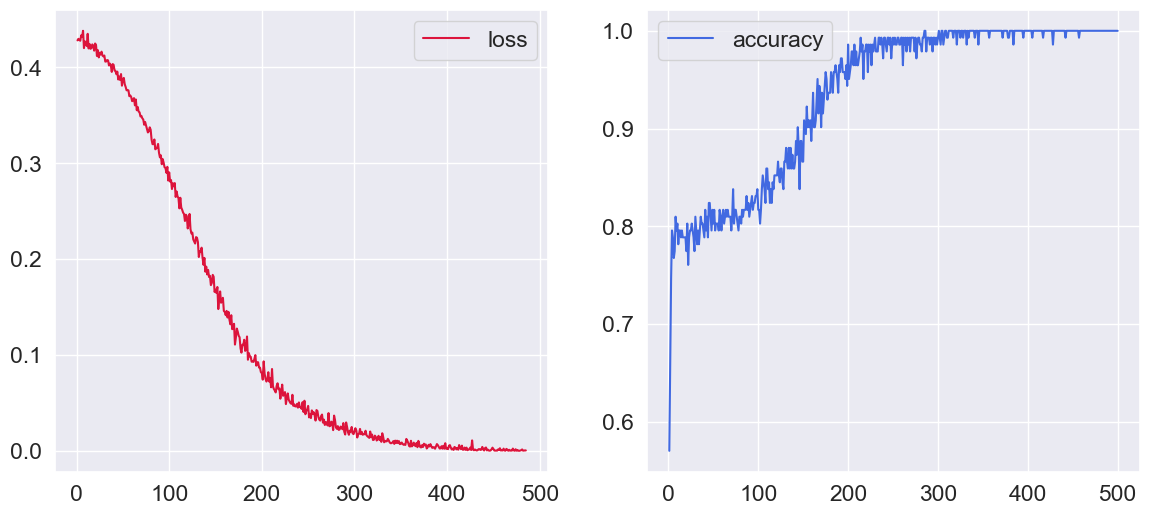

In [14]:
loss_values = history.history["accuracy"]
epocas = range(1,len(loss_values)+1)
fig = plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(range(1,len(all_mea_avg[15:])+1),all_mea_avg[15:],label = "loss",color="crimson")
plt.legend()
plt.subplot(122)
plt.plot(epocas, loss_values,label="accuracy",color="royalblue")
plt.legend()
plt.show()

# Prediccion

In [15]:
model.evaluate(test_data,test_labels)

3/3 [==============================] - 0s 4ms/step - loss: 2.1545 - accuracy: 0.7901


[2.1544651985168457, 0.790123462677002]

In [45]:
# datos extraidos de test_data resultado 0

paciente = pd.DataFrame(test_data.iloc[3])
paciente = paciente.T
paciente

,age,sex,cp,trestbps,chol,restecg,oldpeak,thal
192,-0.037448,0.768425,-1.308928,-1.348804,1.340032,-1.030694,-0.871563,1.253713


In [29]:
patient = {'age':[57],'sex':[1], 'cp':[1],'trestbps':[124],'chol':[261],'restecg':[0],'oldpeak':[0.3],'thal':[3]}
patient2 = {'age':[10],'sex':[0], 'cp':[1],'trestbps':[50],'chol':[30],'restecg':[1],'oldpeak':[0.1],'thal':[2]}
paciente = pd.DataFrame(data=patient2)
paciente = paciente-mean
paciente = paciente/std
paciente.head()

,age,sex,cp,trestbps,chol,restecg,oldpeak,thal
0,-4.685428,-1.465919,-1.308928,-4.758765,-4.743586,-0.036811,-0.784636,0.232369


In [17]:
test_labels.head()

189    1
190    0
191    1
192    0
193    1
Name: target, dtype: int64

In [46]:
result = model.predict(paciente)
print(result)

1/1 [==============================] - 0s 36ms/step
[[0.14542504]]


In [ ]:
# Obtener los resultados para todos los datos en test_data

lengt = len(test_data)
predicciones =[]
for i in range(lengt):
    value_predict = pd.DataFrame(test_data.iloc[i]).T
    target_predict = model.predict(value_predict,verbose=False)
    predicciones.append(target_predict)
    


In [68]:
# valor medio de los resultados, como la variable es binaria y esta entre 0 y 1 el punto de corte es 0.5
sum = 0
for l in predicciones:
    sum = sum + l
    
mean = sum/len(predicciones)
print(mean)

[[0.49974984]]
